## 6.9 使用随机森林建立风险评估模型

### 随机森林简介
随机森林是集成学习的一种代表性方法，能够处理回归和分类问题。集成学习的主要思想是“三个臭皮匠顶个诸葛亮”，从多个角度给出多样化的预测值，在根据集体决策的原则进行决策。最终实现将一组效果一般的模型组合成一个强大的模型。
### 工作原理
随机森林的基本构建是决策树，扮演着臭皮匠的角色。决策树可以看做是一种依据特征取值的差异进行样本划分的手段，依据每个特征可以构建一个决策桩实现对样本的逐层划分，最终期望构建一些样本类别纯度较高（划分到该节点的样本的类别单一）的叶子节点。叶子节点中的训练样本的类别分布也称为预测时类别判定的依据。预测时，同样依据特征进行样本的逐层划分，样本最终落入的节点中的类别分布称为当前测试样本类别判定的依据。

我们通过使用随机的方式从数据中抽取样本和特征，训练多个不相同的决策树，形成“森林”。为了根据属性对新对象进行分类，每个树都给出自己的分类意见，称“投票”。在分类问题下，森林选择选票最多的分类；在回归问题下则使用平均值的方法。随机森林是基于 Bagging 方法的集成模型，Bagging 的示例如下：


![](https://ai-studio-static-online.cdn.bcebos.com/f568c67380af45e6a21ab538eb9df50b75dcae7ebf754813909fbc7df3f6c400)


若每一个分类模型都是决策树，那么就构成了“随机森林”。 Bagging 方法通过抽样的方式获得多份不同的训练样本，在不同的训练样本上训练决策树，从而降低了决策树之间的相关性。同时还通过特征的随机选取，特征阈值的随机选取两种方式引入随机性，进一步降低决策树之间的相关性。

随机森林的优点：

随机森林有处理更高维度的大数据集的能力，并能够识别最重要的变量，因此也可作为一种降维方法。且当很大一部分数据丢失时，它能有效估计丢失值，并保持较高准确性。能够处理不平衡类数据集上的平衡错误。

随机森林输入替换后数据样本称为自助抽样。其中三分之一的数据不用于训练但是可以用于测试。被称为袋外样本(out-of-bag)。在这些袋外样本上估计的误差称为袋外误差。对袋外误差估计的研究表明，袋外估计与使用与训练集相同大小的测试集一样准确，使用袋外误差估计可以去除备用测试集。

下面我们通过随机森林模型构建分类模型。

在 Sklearn 的 ensemble 模块中，可以直接调用 RandomForestClassifier。再将划分好的训练集 (x_trian,y_train) 带入模型中进行训练，并进行调参优化；模型训练好后便可带入测试集 (x_test) 进行预测。


## 实训任务：

- 使用 `RandomForestClassifier` 新建一个模型对象，命名为 `rf_clf`。
- 对 `rf_clf` 对象调用 `fit` 方法，带入训练集 `x_train`, `y_train` 进行训练。
- 对训练好的 `rf_clf` 模型调用 `predict_proba` 方法，带入 `x_test` 进行预测，并将结果保存到变量 `y_predict` 中。


In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 读取数据
data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

# 使用 RandomForestClassifier 新建一个模型对象，命名为 rf_clf
rf_clf = RandomForestClassifier(random_state=33)

# 对 rf_clf 对象调用 fit 方法，带入训练集 x_train, y_train 进行训练
rf_clf.fit(x_train, y_train)

# 对训练好的 rf_clf 模型调用 predict_proba 方法，带入 x_test 进行预测，并将结果保存到变量 y_predict 中
y_predict = rf_clf.predict_proba(x_test)[:, 1]

# 查看模型效果
test_auc = roc_auc_score(y_test, y_predict)
print("AUC Score (Test): %f" % test_auc)

AUC Score (Test): 0.943785


## 6.10 随机森林决策树数目参数调优 

上一步我们没有进行任何的调参，下面对随机森林参数进行调优： 我们先对随机森林的n_estimators进行调优，n_estimators表示随机森林中决策树的数目。

## 实训任务

设置参数 `n_estimators`，取值为区间 [50,200] 中的任意值，如此处取值 100。

对训练好的模型调用 `predict_proba` 方法，带入 `x_test` 进行预测，并将结果保存到变量 `y_predict1` 中，观察调参效果。


可以看到，通过调参之后，模型效果略有提升，接下来我们以更便捷的图形方式展示调参过程。

In [2]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
data = pd.read_table('dataset13.txt',sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)

# 尝试设置参数n_estimators
rf_clf1 = RandomForestClassifier(n_estimators=100)
rf_clf1.fit(x_train, y_train)
y_predict1 = rf_clf1.predict_proba(x_test)[:, 1]

# 查看模型效果
test_auc = roc_auc_score(y_test,y_predict1)
print ("AUC Score (Test): %f" % test_auc)

AUC Score (Test): 0.943430


## 6.11 随机森林参数调优

我们已尝试了对随机森林参数 `n_estimators` 的调优，但是手动输入尝试不同数值比较麻烦，下面我们通过画图的方式直观找到相对最优的 `n_estimators`。

设置 `n_estimators` 在 100-210 中每隔 20 取一个数值同时代入模型中，求出 `n_estimators` 在此取值时模型的 AUC 值，最后画出在不同 `n_estimators` 下 `AUC` 取值的折线，观察图形即可得到相对最优的 `n_estimators`。


## 实训任务

- 设置 `n_estimators` 在 100-210 中每隔 20 取一个数值。
- 对训练好的rf模型调用 `predict_proba` 方法，带入 `x_test` 进行预测，并将结果保存到变量 `y_predict` 中。
- 将我们使用的 `n_estimators` 取值(已保存在 `estimators` 中）设置为 x 轴，AUC 分数的数组设置为 y 轴，画出图形。


可以看到我们对 `n_estimators` 在 100-210 中每隔 20 取一个值，`n_estimators` 为 180 时评分最好，较之前略有提升。

estimators = [100, 120, 140, 160, 180, 200]
best_scores_test = 0.9478030243517104


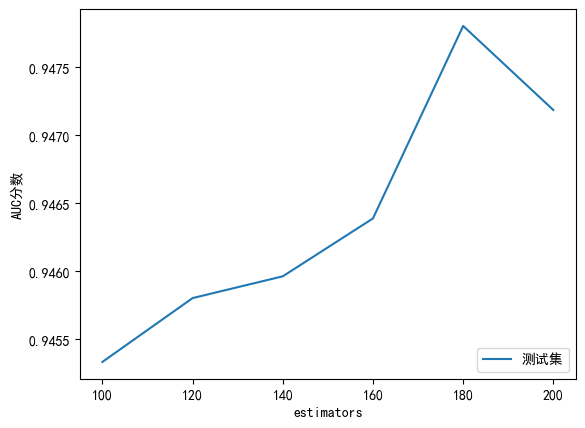

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

# 定义存储AUC分数的数组
scores_train = []
scores_test = []
# 定义存储n_estimators取值的数组
estimators = []

# 设置n_estimators在100-210中每隔20取一个数值
for i in range(100, 211, 20):
    estimators.append(i)
    rf = RandomForestClassifier(n_estimators=i, random_state=12)
    rf.fit(x_train, y_train)
    y_predict = rf.predict_proba(x_test)[:, 1]
    scores_test.append(roc_auc_score(y_test, y_predict))

# 查看我们使用的n_estimators取值
print("estimators =", estimators)

# 查看以上模型中在测试集最好的评分
print("best_scores_test =", max(scores_test))

# 画出n_estimators与AUC的图形
fig, ax = plt.subplots()

# 设置x y坐标名称
ax.set_xlabel('estimators')
ax.set_ylabel('AUC分数')
plt.plot(estimators, scores_test, label='测试集')

# 显示汉语标注
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = ['sans-serif']

# 设置图例
plt.legend(loc="lower right")
plt.show()

## 6.12 使用网格搜索进行随机森林参数调优

在机器学习建模时，通常待调节的参数有很多，参数之间的组合更是繁复。人力手动调节注意力成本太高，使用循环的方法受限于太过分明的层次，不够简洁与灵活且易出错。
我们可以借助 sklearn 中 model_selection 模块的 `GridSearchCV()` 函数进行网格搜索调参，它能够在指定的范围内自动搜索具有不同参数的不同模型组合，有效的解决了手动调参的问题。其函数语法为：`GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, cv=’warn’)`，其中：
- `estimator` -- 所使用的分类器。
- `param_grid` -- 值为字典或者列表，即需要最优化的参数的取值。
- `scoring` -- 准确度评价标准。
- `n_jobs` -- 并行运行的作业数。
- `cv` -- 交叉验证参数。

### 交叉验证
当我们评估不同的参数时，在测试集上仍然存在着过拟合风险，因为参数要不断调整到模型最佳为止。在这个过程中，关于测试集的信息就会“泄漏”到模型中，评估指标也不再泛化。

为了解决这个问题，数据集的一部分被作为“验证集”，在训练集上训练数据，然后在验证集上验证，直到模型优化到一定程度，再在测试集上最终评价。 然而，把数据集分为三部分，我们用来学习模型的训练数据将减少，并且模型结果依赖划分数据集的特定随机数。

cross-validation (CV) 过程用来解决这个问题。测试数据集仍然用来做最终的评价，但是验证集不再需要。k 折 CV 方法，把训练数据划分为 k 个小数据集，k-1 折数据用来训练，余下的数据用来评估。k 折 CV 方法采用递归计算中的平均值作为模型评价，这种方法会导致较大的计算量，但是没有浪费数据。

提醒：交叉验证选出最优的参数之后，需要在完整的训练集上使用最优参数重新训练模型，然后在测试集上测试性能。

![](https://ai-studio-static-online.cdn.bcebos.com/1ccc374a70b642068be09d3bf30c44c1f9c550c346ac467c830bca10ddd71f80)


下面我们对随机森林其它参数也进行调试，如：

`max_depth` ： 决策树的最大深度


## 实训任务：

- 设置网格搜索各项参数，各项参数取值分别为：`{'n_estimators': [180,190],'max_depth': [8,10]}`，参数保存在 `tuned_parameters` 中。
- 对随机森林模型 `rf` 使用`GridSearchCV()`方法，评分方式 `scoring` 设置为 `roc_auc` ，并行运行的作业数 `n_jobs` 设置为2，交叉验证参数 `cv` 设置为 `5`，网格搜索模型保存为 `rf_clf`。
- 对模型调用 `fit` 方法进行训练，并对训练好的 `rf_clf` 模型使用 `predict_proba` 方法带入 `x_test` 进行预测，并将结果保存到变量 `y_predict` 中。
- 对 `rf_clf` 对象调用 `roc_auc_score()` 方法，将 `y_test，y_predict` 作为输入参数，求出测试集AUC值，将结果赋予test_auc。


利用网格搜索，我们便能够便捷地调试出相对最理想的算法效果，从而构建出我们所需的风控模型。 

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

rf = RandomForestClassifier()

# 设置需要调试的参数
tuned_parameters = {'n_estimators': [180, 190], 'max_depth': [8, 10]}

# 调用网格搜索函数
rf_clf = GridSearchCV(rf, tuned_parameters, scoring='roc_auc', n_jobs=2, cv=5)
rf_clf.fit(x_train, y_train)

y_predict = rf_clf.predict_proba(x_test)[:, 1]
test_auc = roc_auc_score(y_test, y_predict)

print('随机森林模型test AUC:')
print(test_auc)

随机森林模型test AUC:
0.9196651462531928
